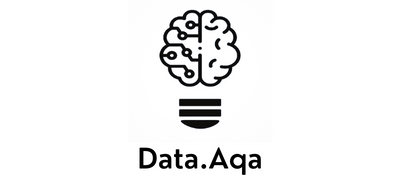

# <font color = #21618C><center><u>Manipulação de Dados</u></center>

Saber manipular dados é uma habilidade <font color = red>**essencial**<font color = black> para se tornar um cientista de dados. Praticamente todos os processos em um projeto de ciência de dados envolvem a manipulação dos dados.

Por meio da manipulação de dados é possível <u>limpar</u> e <u>organizar</u> seu _dataset_.

A intenção desta aula é apresentar as técnicas e _bibliotecas_ que mais usamos na manipulação dados.

## <font color = #21618C>Mas o que são bibliotecas?
---
Podemos dizer, de maneira bem simplista, que _bibliotecas_ são como funções: pedaços de código pronto que executam tarefas, e a assim como as funções, elas também facilitam nossas vidas.

As bibliotecas tem esse nome porque possuem várias funções dentro delas. Em geral, são desenvolvidas dentro de um escopo de atuação definido. Existem bibliotecas para praticamente _qualquer_ coisa.


Elas são desenvolvidadas pela comunidade e disponibilizadas para uso geral. Por isso, precisamos instala-las.


<font size = 2>*Se você instalou o Anaconda em seu computador, muitas bibliotecas já estão instaladas na sua máquina.

Como estamos falando sobre manipulação de dados, vamos utilizar a biblioteca mais utilizada para isso: `pandas`

## <font color = #21618C><u>Pandas

Apesar de parecer, o nome não é uma homenagem ao animal. Ele vem na verdade de **Panel Data** (dados em painel), e tem esse nome por criar e manipular estruturas de dados em painel, ou tabulares.

Dados tabulares, caso nunca tenha ouvido esse termo, são dados dispostos no formato de tabela. O exemplo mais comum são as planilhas do excel, em que os dados estão dispostos em linhas e colunas.

As duas principais estruturas utilizadas pelo `pandas` são as **Séries** e os **DataFrames**. Vamos começar pelos DataFrames.

### <font color = #21618C><u>DataFrames
---
_DataFrames_ são estruturas de dados rotuladas bi-dimensionais. Ele possui três componentes principais: linhas, colunas e valores. Estas estruturas podem ser acessadas por meio dos índices (`index`), colunas (`column labels`) ou ambos.

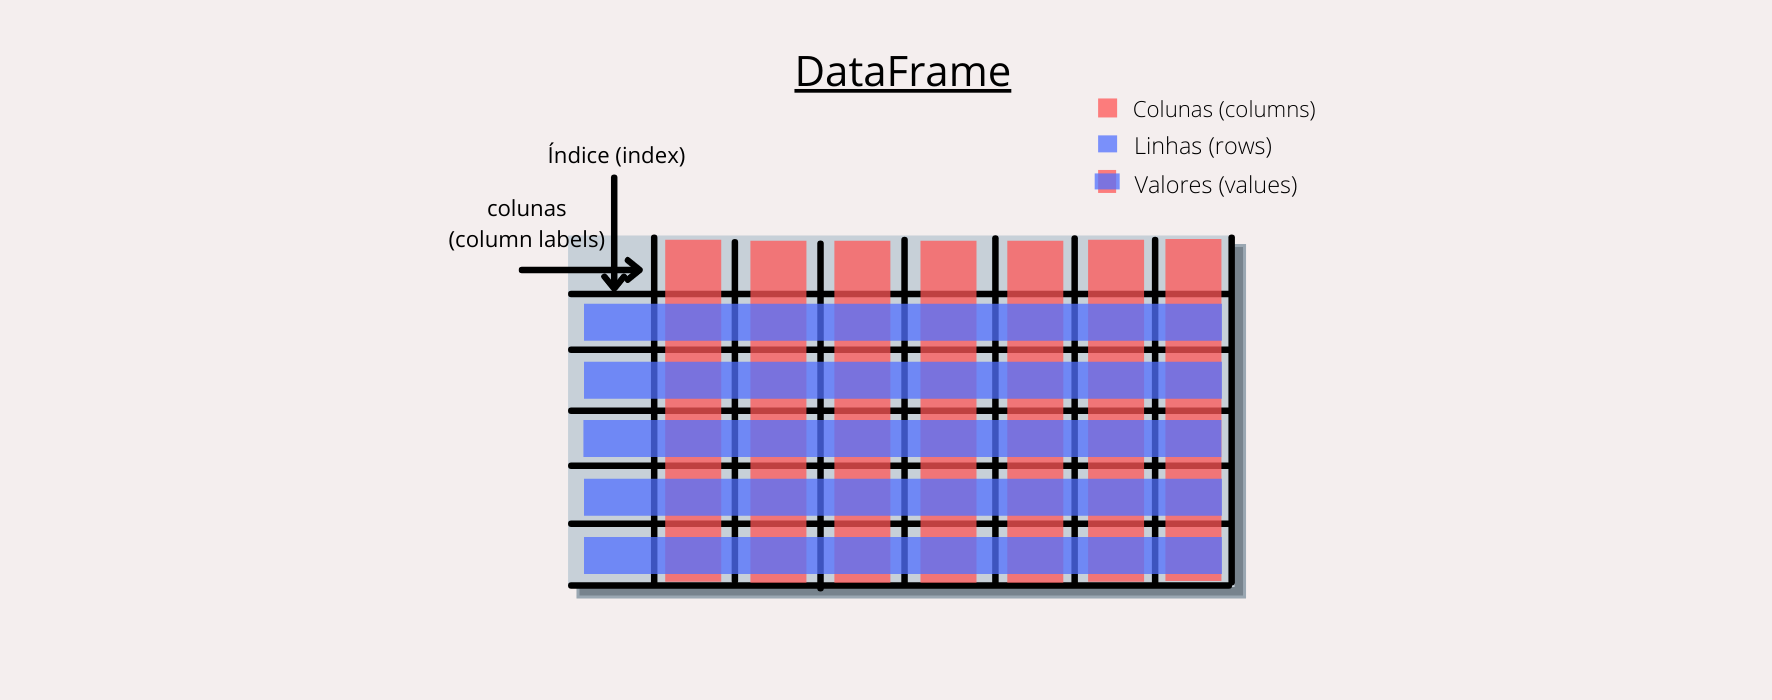

## <font color = #21618C>Vamos para o código!
---
O primeiro passo para lidar com bibliotecas (além de instala-las) é sempre importa-las. Importar uma biblioteca significa que as funções que ela possui estarão disponíveis para serem usadas no ambiente para o qual ela foi importada.

A partir de agora vamos focar mais no código em si. Não vamos passar por todos os métodos, então encorajamos vocês a conferirem quais funções estão disponíveis para os DataFrames depois!

# <font color = #21618C>Pandas Básico
---

In [ ]:
# Importando a biblioteca

import pandas as pd

# Lendo o arquivo ('imdb_top_1000.csv') e armazenando em uma variável

df = pd.read_csv('imdb_top_1000.csv') # .read_csv(): lê arquivos no formato csv.

## <font color = #21618C>Acessando valores
---
Existem várias maneiras de acessar valores de um DataFrame. Podemos acessá-los por linhas, por colunas e pelos dois juntos.

### <font color = #21618C>Linhas
O acesso das linhas é feito por meio dos métodos `.iloc` e `.loc`, combinadas com o índice das linhas que queremos acecssar.

### `.iloc[]` e `.loc[]`
Os métodos `.iloc` e `.loc` cumprem o mesmo papel de acessar uma ou mais linhas. A diferença é que o primeiro faz o acesso por meio dos índices das linhas desejadas, enquanto o segundo utiliza os *nomes* dos índices.

Se o seu eixo do índices (`axis = 0`) não for nomeado, os dois métodos funcionam. Se os índices forem nomeados, devemos utilizar o método `.loc[]`.

No nosso caso, os índices não são nomeados.

In [ ]:
# Acessando 5ª linha

# .iloc
df.iloc[5]

# .loc
df.loc[5]

Quando acessamos apenas uma linha, o objeto retornado é um vetor (em termos práticos, pensem em linha como sendo uma lista).

### <font color = #21618C>Colunas
---
As colunas podem ser acessadas de duas maneiras: notação de *dicionários* e notação de *atributos*
    
**Dicionário**: `dicionário['chave']` $\rightarrow$ `DataFrame['coluna']`
    
**Atributos**: `df.coluna`

In [ ]:
# Dicionário
df['Series_Title']

# Atribbuto
df.Series_Title

Quando acessamos apenas uma coluna, o objeto retornado é um Séries `pd.Serie`. Se quisermos acessar mais de uma coluna, devemos utilizar a notação de dicionário com colchetes duplos.

In [ ]:
# Multiplas colunas
df[['Series_Title', 'Released_Year']]

### <font color = #21618C> Linhas e Colunas
Para combinar as linhas e colunas, utilizamos os métodos `.loc[]` e `.iloc[]`. A sintaxe é a mesma para acessar linhas, basta adicionar uma vírgula e o nome da coluna desejada após o índice.

In [ ]:
# .loc[]
df.loc[[0,2,3], ['Series_Title', 'Released_Year', 'Genre']]

# .iloc[]
df.iloc[[0,2,3], [0,1,3]]

<br>

Agora que sabemos o básico sobre pandas, vamos fazer uma breve exploração do conjunto de dados

## <font color = #21618C>Preparação, Limpeza e Exploração dos Dados
   ---

In [ ]:
# Vendo as primeiras linhas

df.head() # .head(): mostra as primeiras 5 linhas do DataFrame

In [ ]:
# Vendo quais são as colunas do nosso DataFrame

df.columns # DataFrame.columns: retorna os nomes das colunas (column labels)

In [ ]:
# Removendo colunas que não interessam

col_drop = ['Poster_Link', 'Certificate', 'Overview', 'Star2', 'Star3', 'Star4']

# DataFrame.drop: Remove linhas ou colunas
df = df.drop(labels = col_drop, axis = 1)

***OBS:*** *o argumento axis indica em qual eixo do DataFrame a função deve procurar os nomes passados como argumento ('labels'). O eixo dos índices é o eixo 0, e das colunas é o eixo 1.*

In [ ]:
# Renomeando colunas restantes

# Dicionário contendo as alterações
col_dict = {'Series_Title' : 'nome', 'Released_Year' : 'lancamento', 'Runtime' : 'duracao',
            'Genre' : 'genero', 'IMDB_Rating' : 'nota_imdb', 'Meta_score' : 'nota_critica',
            'Director' : 'diretor', 'Star1' : 'astro', 'No_of_Votes' : 'votos', 'Gross' : 'bilheteria'}

# DataFrame.rename: função para renomear colunas ou linhas
df = df.rename(columns = col_dict)

In [ ]:
df.head()

In [ ]:
# Segunda maneira

# lista com nomes novos
col_list = ['nome', 'lancamento', 'duracao', 'genero', 'nota_imdb',
            'nota_critica', 'diretor', 'astro', 'votos', 'bilheteria']

# Redefinindo atributo DataFrame.columns
df.columns = col_list

In [ ]:
# Vendo DataFrame atualizado

df.head()

In [ ]:
# Vendo informações sobre o DataFrame

df.info()

**Converter**:
`lancamento`, `bilheteria`, `duração`

**Valores Faltes**:
`nota_critica`, `bilheiteria`

In [ ]:
# Convertendo 'lancamento'

df['lancamento'] = df['lancamento'].astype(int) # Series.astype(): converte a série para a o tipo passado como argumento

A linha retorna um erro. Isso ocorre porque existe uma ou mais valores que não são números.

Vamos encontrar esses valores.

##  <font color = #21618C>Filtros Booleanos
---
Filtros Booleanos são uma maneira de filtrar um DataFrame ou Série baseado em condições. Eles combinam a notação de dicionário para acessar valores com variáveis booleanas.

***Breve explicação: Dados Booleanas***

Dados booleanos são um tipo de dado lógico que representa apenas dois valores: `0` ou `1`, `True` ou `False`. Ele é muito usado em comparações e operações logicas.

Utilizando a notação de dicionário, ao ínves de passarmos o nome de uma coluna, nós passamos uma operação lógica.

A mensagem de erro dizia haver uma string `'PG'` entre os valores da coluna. Para sabermos em qual linha está essa string vamos utilizar filtros booleanos.

In [ ]:
# Filtros Booleanos
df[df['lancamento'] == 'PG']

O trecho `df[lancamento] == 'PG'` do código retorna `True` (1) para todas as linhas da coluna `lancamento` que são 'PG' e `False` (0) para as linhas diferentes de 'PG'.

Quando essa expressão é passada como 'argumento' na notação de dicionário, o pandas filtra o dataframe e mostra apenas aquelas linhas em que o retorno é `True`

In [ ]:
# .loc[]
df.loc[966, 'lancamento'] = 1970

In [ ]:
# Convertendo

df['lancamento'] = df['lancamento'].astype(int)

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
# Retirando 'min' da 'duracao'

df['duracao'] = df['duracao'].str.replace(' min', '')  #Series.str.replace(): acessa métodos de str e substitui os caracteres passados

In [ ]:
df['duracao'] = df['duracao'].astype(int)

In [ ]:
# Removendo virgulas e preenchendo valores nulos de 'bilheteria'

df['bilheteria'] = df['bilheteria'].str.replace(',', '')

df['bilheteria'] = df['bilheteria'].fillna(0) # Series.fillna(): preenche os valores nulos com o argumento passado

In [ ]:
df['bilheteria'] = df['bilheteria'].astype(int)

In [ ]:
df.info()

In [ ]:
# Preenchendon valores nulos de 'nota_critica'
df['nota_critica'] = df['nota_critica'].fillna(0)

In [ ]:
df.info()

### <font color = #21618C> Filtrando os Dados

In [ ]:
# Acessando apenas os filmes lançados após o ano 2000
# Usando 'boolean filters' (filtros booleanos)

df[df['lancamento'] >= 2000].head()

In [ ]:
# Usando método DataFrame.query()

df.query('lancamento >= 2000').head()

In [ ]:
# Acessando apenas filmes lançados após o ano 2000 e que tiveram nota no IMDB maior que 8
# Filtro Booleano

df[(df['lancamento'] >= 2000) & (df['nota_imdb'] >= 8)]

In [ ]:
# DataFrame.query()

df.query('lancamento >= 2000 & nota_imdb >= 8').head()

## <font color = #21618C> Agrupando, Ordenando e Plotando
---

In [ ]:
# Agrupando por diretor e calculando a bilheteria total de cada

diretores = df.groupby('diretor')['bilheteria'].sum() 

# pd.groupby(): função que faz a agregação dos dados baseado na coluna passada como argumento. Caso não seja seguida de uma
# ou mais funções de agregação, irá retornar apenas um objeto do tipo .SeriesGroupBy

In [ ]:
# Vendo variável

diretores.head()

In [ ]:
# Ranking decrescente de diretores 

ranking = diretores.sort_values(ascending = False)
ranking

In [ ]:
# Importanto matplotlib

import matplotlib.pyplot as plt

In [ ]:
# Plotando 20 maiores bilheterias acumuladas

ranking[:20].plot(kind = 'bar')

In [ ]:
# Usando o módulo .pyplot (plt)

# Criando os eixos
x = ranking.index[:20]
y = ranking[:20]

# Plotando
plt.figure(figsize = (11, 5))
plt.bar(x, y)

# Rotacionando o texto
plt.xticks(rotation = 90)

# Adicionando título
plt.title('Diretores com maior bilheteria acumulada', fontsize = 15)

# Eixo y
plt.ylabel('Bilheteria (bilhões US$)')

# Grids
plt.grid(axis = 'y', alpha = .25)

plt.show()

<br>

### Referências

1 - McKinney, Wes. Python for Data Analysis